In [135]:
import pandas as pd
import plotly.express as px

In [136]:
df = pd.read_excel('df_temp_all_0-2_last.xlsx')

In [137]:
df.head(3)

year reset    year  temp c  anom c  modern anom c  modern temp c
0           0 -819888  -61.75     NaN            NaN            NaN
1        1069 -818819  -61.75     NaN            NaN            NaN
2        2138 -817750  -61.85     NaN            NaN            NaN

In [138]:
df['year reset dt'] = df['year reset'].apply(lambda x: pd.Period(year=x, freq='Y'))
df.set_index('year reset dt', inplace=True, drop=True)
df.head(3)

year reset    year  temp c  anom c  modern anom c  \
year reset dt                                                      
0                       0 -819888  -61.75     NaN            NaN   
1069                 1069 -818819  -61.75     NaN            NaN   
2138                 2138 -817750  -61.85     NaN            NaN   

               modern temp c  
year reset dt                 
0                        NaN  
1069                     NaN  
2138                     NaN

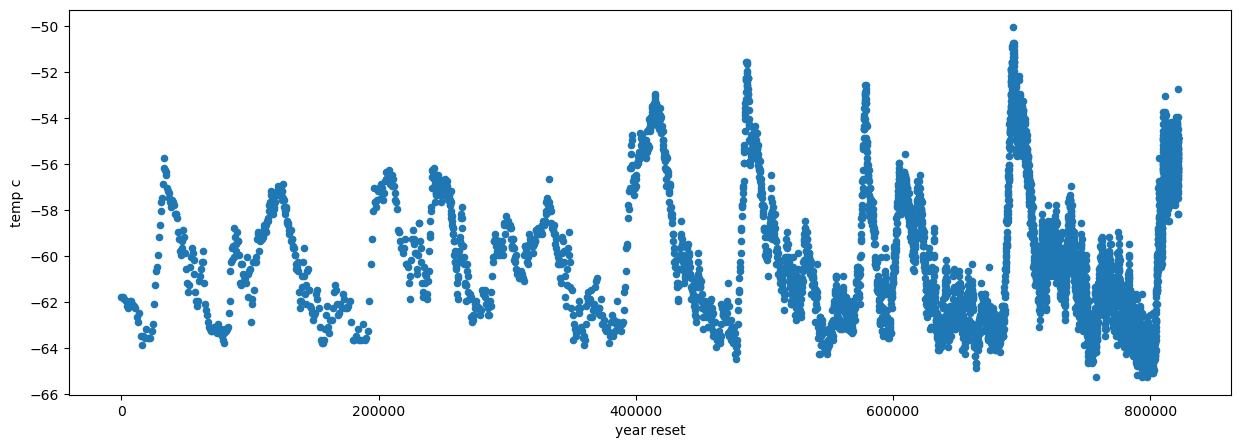

In [139]:
df.plot.scatter(x='year reset', y='temp c',figsize=(15,5));

In [140]:
resampled = df.resample('1000Y')['temp c'].mean().to_frame(name='temp c mean')
resampled.index = resampled.index.asfreq(df.index.freq)

df_with_mean = df.merge(resampled, left_index=True, right_index=True, how='outer')
df_with_mean['cal anom c'] = df_with_mean['temp c'] - df_with_mean['temp c mean'] 
df_with_mean['temp c ffill'] = df_with_mean['temp c'].ffill(axis=0)
df_with_mean['temp c mean ffill'] = df_with_mean['temp c mean'].ffill(axis=0)
df_with_mean.tail()

year reset    year  temp c  anom c  modern anom c  \
year reset dt                                                      
821907           821907.0  2019.0     NaN     NaN           0.91   
821908           821908.0  2020.0     NaN     NaN           1.13   
821909           821909.0  2021.0     NaN     NaN           0.83   
821910           821910.0  2022.0     NaN     NaN           0.93   
821999                NaN     NaN     NaN     NaN            NaN   

               modern temp c  temp c mean  cal anom c  temp c ffill  \
year reset dt                                                         
821907                 14.81          NaN         NaN        -54.85   
821908                 15.03          NaN         NaN        -54.85   
821909                 14.73          NaN         NaN        -54.85   
821910                 14.83          NaN         NaN        -54.85   
821999                   NaN     -55.7475         NaN        -54.85   

               temp c mean ffill  
year reset dt                     
821907                -55.742308  
821908                -55.742308  
821909                -55.742308  
821910                -55.742308  
821999                -55.747500

In [141]:
df_with_mean = df_with_mean.reset_index().astype(str).astype(float)
df_with_mean.head()

year reset dt  year reset      year  temp c  anom c  modern anom c  \
0            0.0         0.0 -819888.0  -61.75     NaN            NaN   
1          999.0         NaN       NaN     NaN     NaN            NaN   
2         1069.0      1069.0 -818819.0  -61.75     NaN            NaN   
3         1999.0         NaN       NaN     NaN     NaN            NaN   
4         2138.0      2138.0 -817750.0  -61.85     NaN            NaN   

   modern temp c  temp c mean  cal anom c  temp c ffill  temp c mean ffill  
0            NaN          NaN         NaN        -61.75                NaN  
1            NaN       -61.75         NaN        -61.75             -61.75  
2            NaN          NaN         NaN        -61.75             -61.75  
3            NaN       -61.75         NaN        -61.75             -61.75  
4            NaN          NaN         NaN        -61.85             -61.75

In [142]:
px.scatter(
    df_with_mean,
    x='year reset dt',
    y='temp c'
    )

In [143]:
df_with_mean['anom joai'] = df_with_mean['temp c'] - df_with_mean['temp c mean ffill']
df_with_mean.head()

year reset dt  year reset      year  temp c  anom c  modern anom c  \
0            0.0         0.0 -819888.0  -61.75     NaN            NaN   
1          999.0         NaN       NaN     NaN     NaN            NaN   
2         1069.0      1069.0 -818819.0  -61.75     NaN            NaN   
3         1999.0         NaN       NaN     NaN     NaN            NaN   
4         2138.0      2138.0 -817750.0  -61.85     NaN            NaN   

   modern temp c  temp c mean  cal anom c  temp c ffill  temp c mean ffill  \
0            NaN          NaN         NaN        -61.75                NaN   
1            NaN       -61.75         NaN        -61.75             -61.75   
2            NaN          NaN         NaN        -61.75             -61.75   
3            NaN       -61.75         NaN        -61.75             -61.75   
4            NaN          NaN         NaN        -61.85             -61.75   

   anom joai  
0        NaN  
1        NaN  
2        0.0  
3        NaN  
4       -0.1

In [144]:
px.scatter(df_with_mean, 
           x='year reset dt', 
           y=['anom c', 'anom joai', 'modern anom c'][-1], 
           width=1200, 
           title = "Comparison of Temperature Anomaly from Jouzel-AICC and NOAA")

In [145]:
px.scatter(df_with_mean, 
           x='year reset dt', 
           y=['anom c', 'anom joai', 'modern anom c'][:2], 
           width=1200, 
           title = "Comparison of Temperature Anomaly from Jouzel-AICC and NOAA")

# note: there's cylicality in anom c. in anom joai, there's an increase in the variance (heteroscedasticity)

In [146]:
df_with_mean.tail(3)

year reset dt  year reset    year  temp c  anom c  modern anom c  \
12456       821909.0    821909.0  2021.0     NaN     NaN           0.83   
12457       821910.0    821910.0  2022.0     NaN     NaN           0.93   
12458       821999.0         NaN     NaN     NaN     NaN            NaN   

       modern temp c  temp c mean  cal anom c  temp c ffill  \
12456          14.73          NaN         NaN        -54.85   
12457          14.83          NaN         NaN        -54.85   
12458            NaN     -55.7475         NaN        -54.85   

       temp c mean ffill  anom joai  
12456         -55.742308        NaN  
12457         -55.742308        NaN  
12458         -55.747500        NaN

In [147]:
df_with_mean['temp constant'] = (df_with_mean['temp c mean ffill'] - df_with_mean['anom c'])
df_with_mean.head()

year reset dt  year reset      year  temp c  anom c  modern anom c  \
0            0.0         0.0 -819888.0  -61.75     NaN            NaN   
1          999.0         NaN       NaN     NaN     NaN            NaN   
2         1069.0      1069.0 -818819.0  -61.75     NaN            NaN   
3         1999.0         NaN       NaN     NaN     NaN            NaN   
4         2138.0      2138.0 -817750.0  -61.85     NaN            NaN   

   modern temp c  temp c mean  cal anom c  temp c ffill  temp c mean ffill  \
0            NaN          NaN         NaN        -61.75                NaN   
1            NaN       -61.75         NaN        -61.75             -61.75   
2            NaN          NaN         NaN        -61.75             -61.75   
3            NaN       -61.75         NaN        -61.75             -61.75   
4            NaN          NaN         NaN        -61.85             -61.75   

   anom joai  temp constant  
0        NaN            NaN  
1        NaN            NaN  
2        0.0            NaN  
3        NaN            NaN  
4       -0.1            NaN

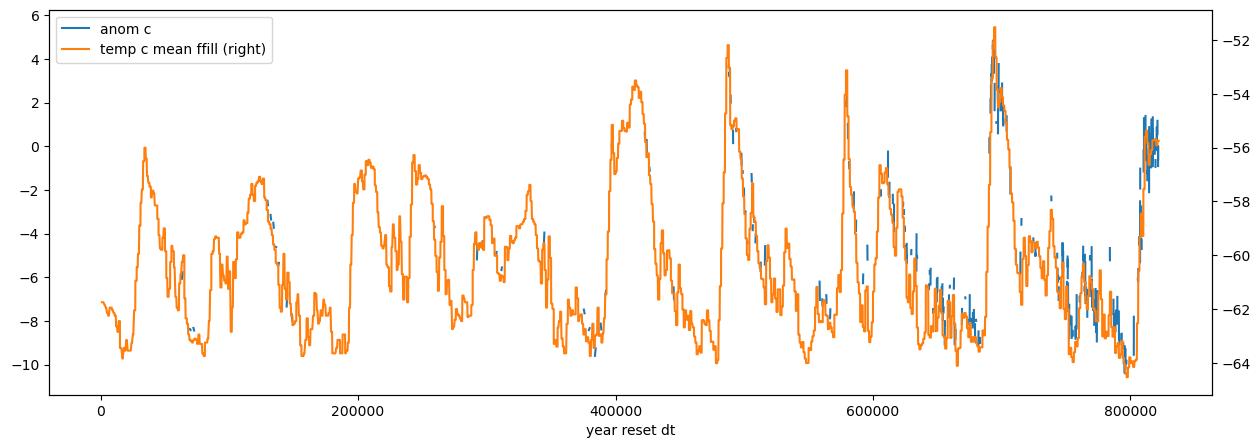

In [148]:
df_with_mean.plot(kind='line', x='year reset dt',
                          y=['anom c', 'temp c mean ffill'],
                          secondary_y=['temp c mean ffill'], figsize=(15,5)
                          );

In [149]:
px.scatter(df_with_mean, 
           x='year reset dt', 
           y=['anom c', 'temp constant', 'temp c mean ffill', 'anom joai'],
           width=1200, 
           title = "Comparison of Temperature Anomaly from Jouzel-AICC and NOAA")

anomalized
a data transformation that involves subtracting a long-term mean value from all time series values.

# assume both from same dataset

In [150]:
# anom c + temp c mean
df_with_mean.head()

year reset dt  year reset      year  temp c  anom c  modern anom c  \
0            0.0         0.0 -819888.0  -61.75     NaN            NaN   
1          999.0         NaN       NaN     NaN     NaN            NaN   
2         1069.0      1069.0 -818819.0  -61.75     NaN            NaN   
3         1999.0         NaN       NaN     NaN     NaN            NaN   
4         2138.0      2138.0 -817750.0  -61.85     NaN            NaN   

   modern temp c  temp c mean  cal anom c  temp c ffill  temp c mean ffill  \
0            NaN          NaN         NaN        -61.75                NaN   
1            NaN       -61.75         NaN        -61.75             -61.75   
2            NaN          NaN         NaN        -61.75             -61.75   
3            NaN       -61.75         NaN        -61.75             -61.75   
4            NaN          NaN         NaN        -61.85             -61.75   

   anom joai  temp constant  
0        NaN            NaN  
1        NaN            NaN  
2        0.0            NaN  
3        NaN            NaN  
4       -0.1            NaN

In [161]:
df_with_mean['temp meanf anom'] = df_with_mean['anom c'] + df_with_mean['temp c mean ffill']
#df_with_mean['anom c alt'] = df_with_mean['temp c ffill'] - df_with_mean['temp meanf anom']
df_with_mean['anom c alt'] = df_with_mean['temp meanf anom'] - df_with_mean['temp c ffill']
df_with_mean.head()



year reset dt  year reset      year  temp c  anom c  modern anom c  \
0            0.0         0.0 -819888.0  -61.75     NaN            NaN   
1          999.0         NaN       NaN     NaN     NaN            NaN   
2         1069.0      1069.0 -818819.0  -61.75     NaN            NaN   
3         1999.0         NaN       NaN     NaN     NaN            NaN   
4         2138.0      2138.0 -817750.0  -61.85     NaN            NaN   

   modern temp c  temp c mean  cal anom c  temp c ffill  temp c mean ffill  \
0            NaN          NaN         NaN        -61.75                NaN   
1            NaN       -61.75         NaN        -61.75             -61.75   
2            NaN          NaN         NaN        -61.75             -61.75   
3            NaN       -61.75         NaN        -61.75             -61.75   
4            NaN          NaN         NaN        -61.85             -61.75   

   anom joai  temp constant  temp mfanom  anom c alt  anom cf tcmf  \
0        NaN            NaN          NaN         NaN           NaN   
1        NaN            NaN          NaN         NaN           NaN   
2        0.0            NaN          NaN         NaN           NaN   
3        NaN            NaN          NaN         NaN           NaN   
4       -0.1            NaN          NaN         NaN           NaN   

   temp meanf anom  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN

In [162]:
px.scatter(df_with_mean, 
           x='year reset dt', 
           y=['temp c ffill', 'anom c', 'temp meanf anom', 'anom c alt'],
           width=1200, 
           title = "Comparison of ")

In [153]:
# anom c +temp c mean ffill
df_with_mean['anom cf tcmf'] = df_with_mean['anom c'] + df_with_mean['temp c mean ffill']
#df_with_mean['anom cf tcmf'] = df_with_mean['anom temp m'].ffill(axis=0)
df_with_mean.head()

year reset dt  year reset      year  temp c  anom c  modern anom c  \
0            0.0         0.0 -819888.0  -61.75     NaN            NaN   
1          999.0         NaN       NaN     NaN     NaN            NaN   
2         1069.0      1069.0 -818819.0  -61.75     NaN            NaN   
3         1999.0         NaN       NaN     NaN     NaN            NaN   
4         2138.0      2138.0 -817750.0  -61.85     NaN            NaN   

   modern temp c  temp c mean  cal anom c  temp c ffill  temp c mean ffill  \
0            NaN          NaN         NaN        -61.75                NaN   
1            NaN       -61.75         NaN        -61.75             -61.75   
2            NaN          NaN         NaN        -61.75             -61.75   
3            NaN       -61.75         NaN        -61.75             -61.75   
4            NaN          NaN         NaN        -61.85             -61.75   

   anom joai  temp constant  temp mfanom  anom c alt  anom cf tcmf  
0        NaN            NaN          NaN         NaN           NaN  
1        NaN            NaN          NaN         NaN           NaN  
2        0.0            NaN          NaN         NaN           NaN  
3        NaN            NaN          NaN         NaN           NaN  
4       -0.1            NaN          NaN         NaN           NaN

In [154]:
px.scatter(df_with_mean, 
           x='year reset dt', 
           y=['temp c', 'anom c', 'anom cf tcmf', 'anom c alt'],
           width=1200, 
           title = "Comparison of ")

# try kelvin - x

In [155]:
# df_with_mean['temp k']= df_with_mean['temp c']+273.15
# df_with_mean.head(3)

In [156]:
# df_with_mean['temp k ffill'] = df_with_mean['temp k'].ffill(axis=0)
# df_with_mean.head(3)

In [157]:
# df_with_mean['anom k']= df_with_mean['anom c']+273.15
# df_with_mean.head(3)

In [158]:
# px.scatter(df_with_mean, 
#            x='year reset dt', 
#            y=['temp k ffill', 'anom k'],
#            width=1200, 
#            title = "Comparison of ")

In [159]:
#df_with_mean.drop(['temp k', 'temp k ffill', 'anom k'], axis=1)
#df_with_mean.head()

In [160]:
# spline (Brownlee, 2016)
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('df_with_mean.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
series.plot()
pyplot.show()

ImportError: cannot import name 'datetime' from 'pandas' (/home/rsalgo/anaconda3/envs/astropy/lib/python3.12/site-packages/pandas/__init__.py)

In [ ]:
from pandas import read_csv
from pandas import datetime

def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
upsampled = series.resample('D')
print(upsampled.head(32))

In [ ]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('df_with_means.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
upsampled = series.resample('D')
interpolated = upsampled.interpolate(method='spline', order=2)
print(interpolated.head(32))
interpolated.plot()
pyplot.show()

In [ ]:
import pandas as pd
import plotly.express as px

In [ ]:
df = pd.read_excel('df_temp_all_0-2_last.xlsx')

In [ ]:
df.head(3)

In [ ]:
df['year reset dt'] = df['year reset'].apply(lambda x: pd.Period(year=x, freq='Y'))
df.set_index('year reset dt', inplace=True, drop=True)
df.head(3)

In [ ]:
df.plot.scatter(x='year reset', y='temp c',figsize=(15,5));

In [ ]:
resampled = df.resample('1000Y')['temp c'].mean().to_frame(name='temp c mean')
resampled.index = resampled.index.asfreq(df.index.freq)

df_with_mean = df.merge(resampled, left_index=True, right_index=True, how='outer')
df_with_mean['cal anom c'] = df_with_mean['temp c'] - df_with_mean['temp c mean'] 
df_with_mean['temp c ffill'] = df_with_mean['temp c'].ffill(axis=0)
df_with_mean['temp c mean ffill'] = df_with_mean['temp c mean'].ffill(axis=0)
df_with_mean.tail()

In [ ]:
df_with_mean = df_with_mean.reset_index().astype(str).astype(float)
df_with_mean.head()

In [ ]:
px.scatter(
    df_with_mean,
    x='year reset dt',
    y='temp c'
    )

In [ ]:
df_with_mean['anom joai'] = df_with_mean['temp c'] - df_with_mean['temp c mean ffill']
df_with_mean.head()

In [ ]:
px.scatter(df_with_mean, 
           x='year reset dt', 
           y=['anom c', 'anom joai', 'modern anom c'][-1], 
           width=1200, 
           title = "Comparison of Temperature Anomaly from Jouzel-AICC and NOAA")

In [ ]:
px.scatter(df_with_mean, 
           x='year reset dt', 
           y=['anom c', 'anom joai', 'modern anom c'][:2], 
           width=1200, 
           title = "Comparison of Temperature Anomaly from Jouzel-AICC and NOAA")

# note: there's cylicality in anom c. in anom joai, there's an increase in the variance (heteroscedasticity)

In [ ]:
df_with_mean.tail(3)

In [ ]:
df_with_mean['temp constant'] = (df_with_mean['temp c mean ffill'] - df_with_mean['anom c'])
df_with_mean.head()

In [ ]:
df_with_mean.plot(kind='line', x='year reset dt',
                          y=['anom c', 'temp c mean ffill'],
                          secondary_y=['temp c mean ffill'], figsize=(15,5)
                          );

In [ ]:
px.scatter(df_with_mean, 
           x='year reset dt', 
           y=['anom c', 'temp constant', 'temp c mean ffill', 'anom joai'],
           width=1200, 
           title = "Comparison of Temperature Anomaly from Jouzel-AICC and NOAA")

In [ ]:
resampled_float = resampled.reset_index().astype(str).astype(float)

In [ ]:
px.scatter(resampled_float, x='year reset dt', y='temp c mean'
           )

In [ ]:
df.resample('1000Y')['temp c'].mean().plot(figsize=(15,5));
#to_frame().plot(kind='scatter') #.dropna()

In [ ]:
#df['temp c resample 1000Y'] = 
resampled = df.resample('1000Y')['temp c'].mean().to_frame(name='temp c mean')

In [ ]:
resampled.index = resampled.index.asfreq(df.index.freq)

In [ ]:
df_with_mean = df.merge(resampled, left_index=True, right_index=True, how='outer')

In [ ]:
df_with_mean.to_csv('df_with_mean.csv')

In [ ]:
df.to_csv('df.csv')

In [ ]:
df_with_mean['cal anom c'] = df_with_mean['temp c'] - df_with_mean['temp c mean'] 

In [ ]:
df_with_mean['temp c ffill'] = df_with_mean['temp c'].ffill(axis=0)

In [ ]:
df_with_mean.tail(20)

In [ ]:
df_with_mean['temp c mean ffill'] = df_with_mean['temp c mean'].ffill(axis=0)
df_with_mean.tail(20)

In [ ]:
df.resample('1000Y')['temp c'].mean().plot(figsize=(15,5));
#to_frame().plot(kind='scatter') #.dropna()

In [ ]:
#df['temp c resample 1000Y'] = 
resampled = df.resample('1000Y')['temp c'].mean().to_frame(name='temp c mean')

In [ ]:
resampled.index = resampled.index.asfreq(df.index.freq)

In [ ]:
df_with_mean = df.merge(resampled, left_index=True, right_index=True, how='outer')

In [ ]:
df_with_mean.to_csv('df_with_mean.csv')

In [ ]:
df.to_csv('df.csv')

In [ ]:
df_with_mean['cal anom c'] = df_with_mean['temp c'] - df_with_mean['temp c mean'] 

In [ ]:
df_with_mean['temp c ffill'] = df_with_mean['temp c'].ffill(axis=0)

In [ ]:
df_with_mean.tail(20)

In [ ]:
df_with_mean['temp c mean ffill'] = df_with_mean['temp c mean'].ffill(axis=0)
df_with_mean.tail(20)